In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter

In [3]:
df_raw = pd.read_csv('data\creditcard.csv')
df_raw

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

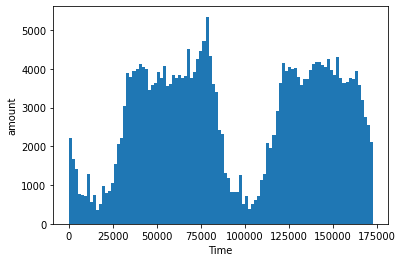

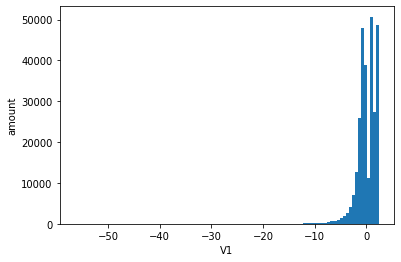

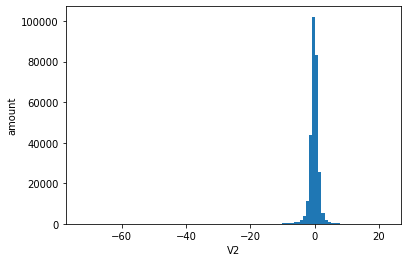

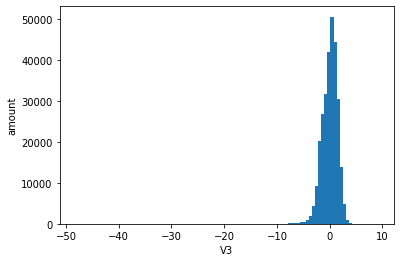

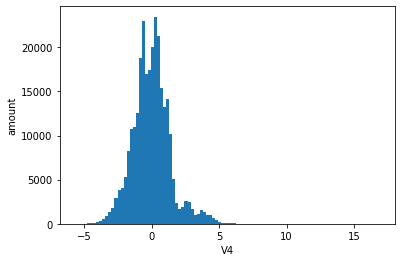

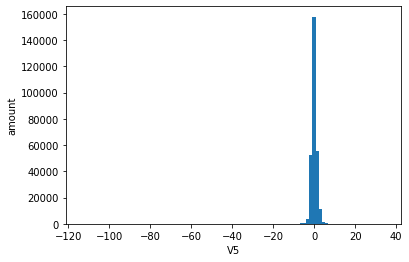

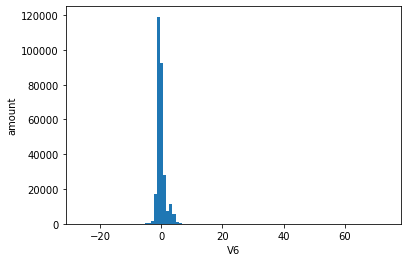

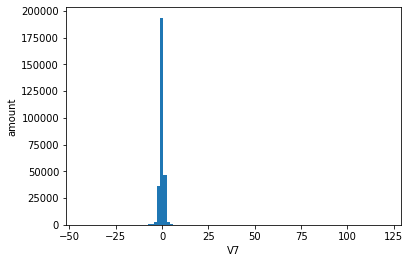

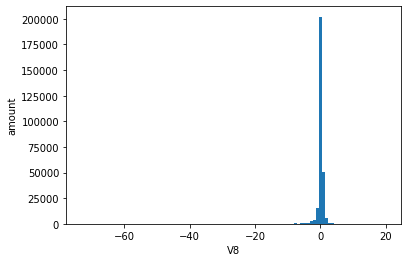

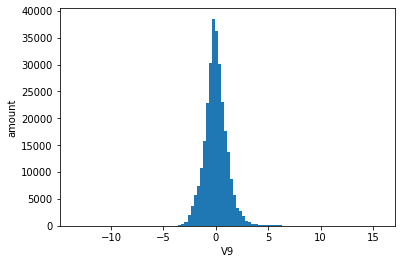

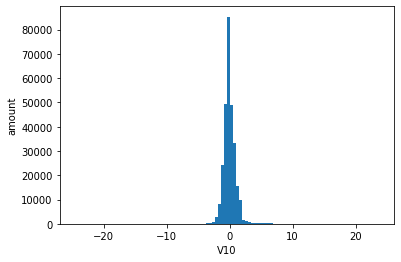

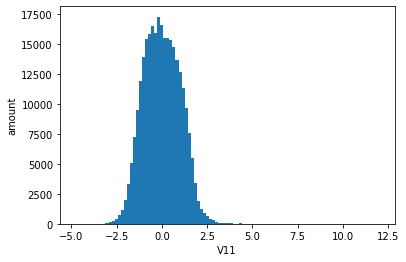

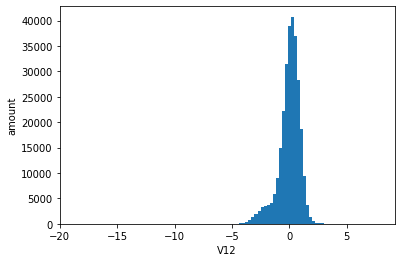

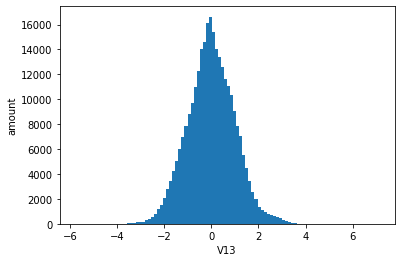

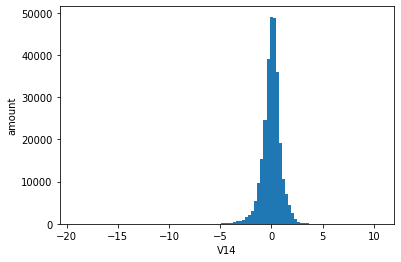

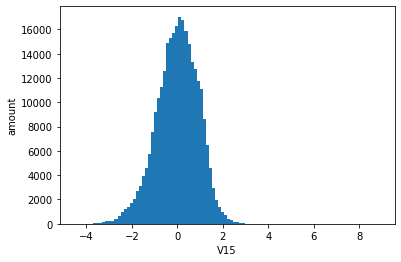

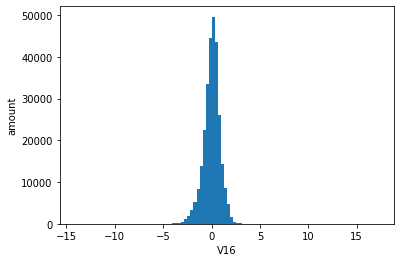

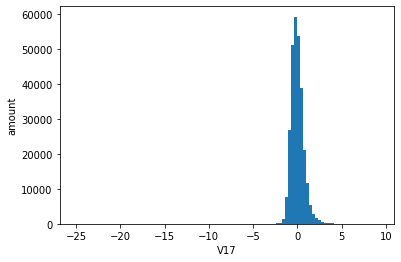

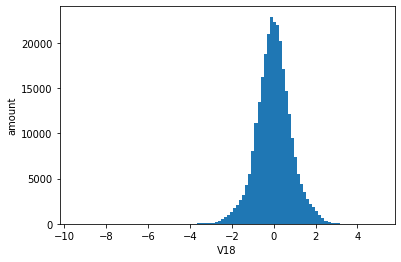

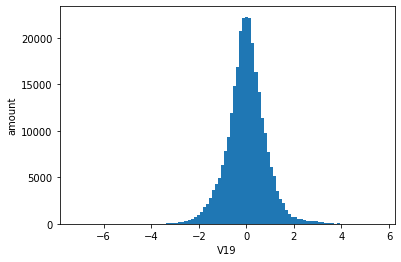

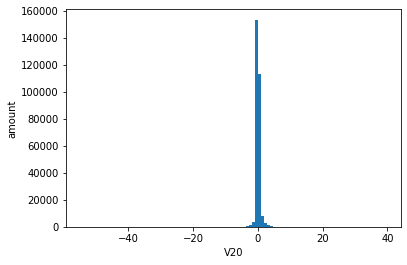

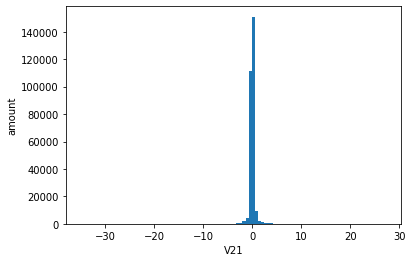

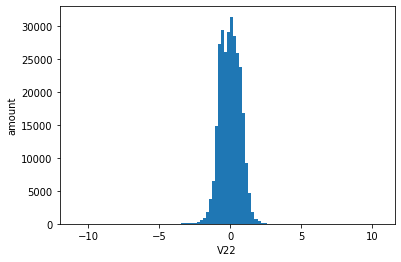

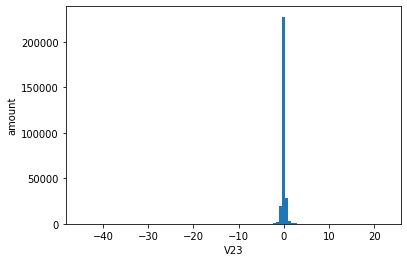

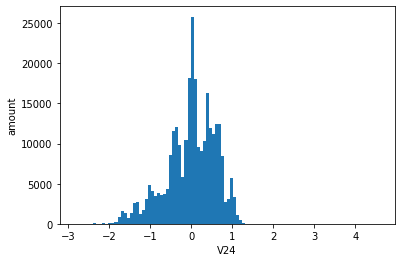

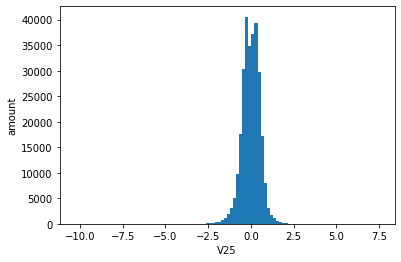

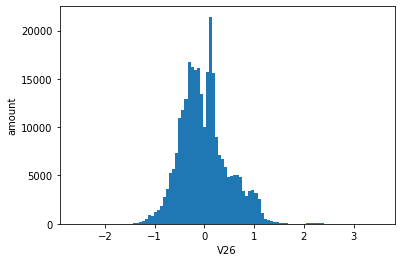

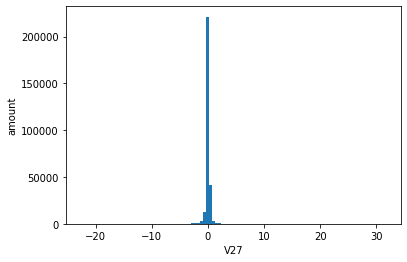

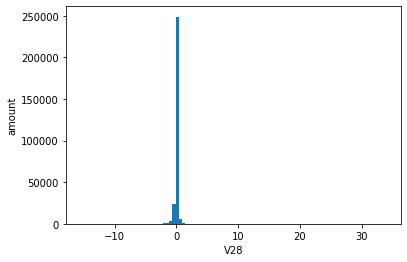

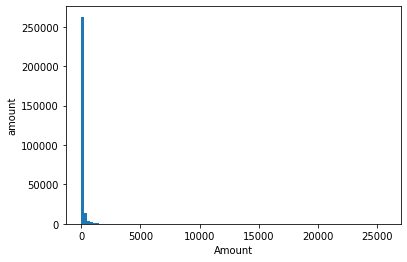

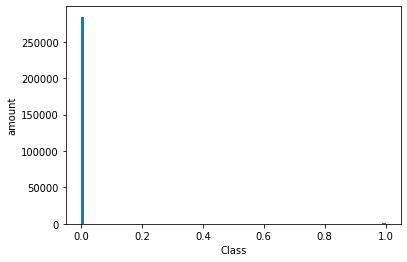

In [4]:
for i in range(len(df_raw.columns)):
    plt.hist(df_raw.iloc[:,i],bins=100)
    plt.xlabel(df_raw.columns[i])
    plt.ylabel('amount')
    plt.show()

In [5]:
df_raw['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
px.pie(values = df_raw['Class'].value_counts(), names = ['Норм','Мошенник'])

In [7]:
# Данные не сбалансированы. Мошеннических транзакций 0.173 % от всех

In [8]:
print('Норм: ', round(df_raw['Class'].value_counts()[0]/len(df_raw['Class'])*100,2))
print('Мошенник: ', round(df_raw['Class'].value_counts()[1]/len(df_raw['Class'])*100,2))

Норм:  99.83
Мошенник:  0.17


In [9]:
df = df_raw.copy()
df.drop_duplicates(inplace= True)

In [10]:
print('before delete dupl:',df['Class'].count())
print('after delete dupl:',df['Class'].count())

before delete dupl: 283726
after delete dupl: 283726


In [11]:
df.describe()

Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.689830      -0.769031      -0.552509   
50%        -0.022248      -0.053468      -0.275168       0.040859   
75%         0.739647       0.612218       0.396792       0.570474   
max        16.875344      34.801666      73.301626     120.589494   

                  V8             V9  ...            V21            V22  \
count  283726.000000  283726.000000  ...  283726.000000  283726.000000   
mean       -0.000854      -0.001596  ...      -0.000371      -0.000015   
std         1.179054       1.095492  ...       0.723909       0.724550   
min       -73.216718     -13.434066  ...     -34.830382     -10.933144   
25%        -0.208828      -0.644221  ...      -0.228305      -0.542700   
50%         0.021898      -0.052596  ...      -0.029441       0.006675   
75%         0.325704       0.595977  ...       0.186194       0.528245   
max        20.007208      15.594995  ...      27.202839      10.503090   

                 V23            V24            V25            V26  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.000198       0.000214      -0.000232       0.000149   
std         0.623702       0.605627       0.521220       0.482053   
min       -44.807735      -2.836627     -10.295397      -2.604551   
25%        -0.161703      -0.354453      -0.317485      -0.326763   
50%        -0.011159       0.041016       0.016278      -0.052172   
75%         0.147748       0.439738       0.350667       0.240261   
max        22.528412       4.584549       7.519589       3.517346   

                 V27            V28         Amount          Class  
count  283726.000000  283726.000000  283726.000000  283726.000000  
mean        0.001763       0.000547      88.472687       0.001667  
std         0.395744       0.328027     250.399437       0.040796  
min       -22.565679     -15.430084       0.000000       0.000000  
25%        -0.070641      -0.052818       5.600000       0.000000  
50%         0.001479       0.011288      22.000000       0.000000  
75%         0.091208       0.078276      77.510000       0.000000  
max        31.612198      33.847808   25691.160000       1.000000  

[8 rows x 31 columns]

In [12]:
#Присутствуют выбросы по каждому из столбцов


# Пример удаления выбросов 

In [13]:
numeric_columns = (list(df.loc[:, 'V1':'Amount']))

In [14]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

In [15]:
# detecting outliers
Outliers_IQR = IQR_method(df,1,numeric_columns )

# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of outliers is: 31685


In [16]:
print('before delete outliers:',df['Class'].count())
print('after delete outliers:',df_out['Class'].count())

before delete outliers: 283726
after delete outliers: 202712


In [17]:
print('Норм: ', round(df_out['Class'].value_counts()[0]/len(df_out['Class'])*100,2))
print('Мошенник: ', round(df_out['Class'].value_counts()[1]/len(df_out['Class'])*100,2))

Норм:  99.99
Мошенник:  0.01


In [18]:
df_out['Class'].value_counts()

0    202686
1        26
Name: Class, dtype: int64

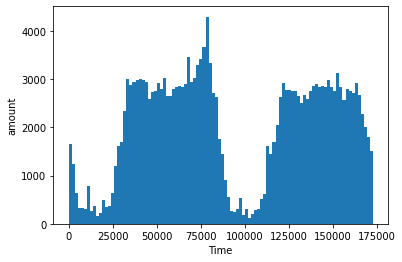

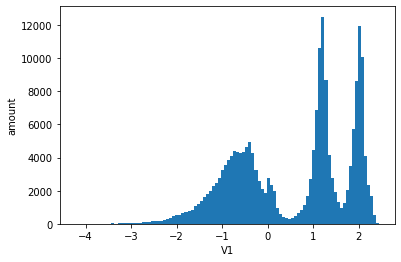

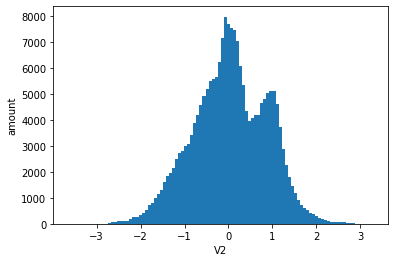

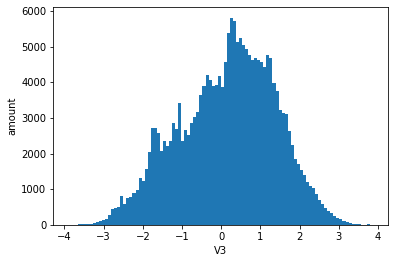

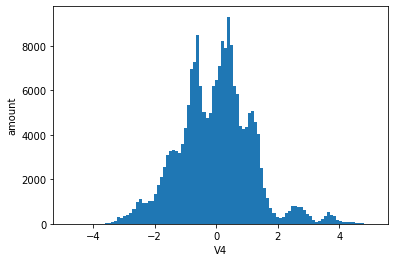

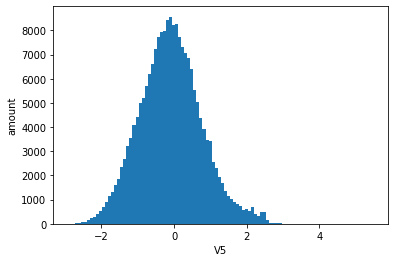

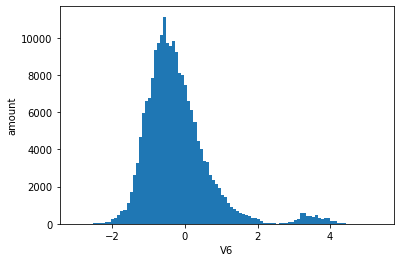

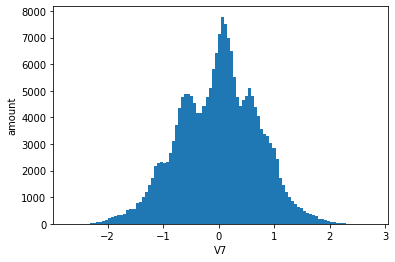

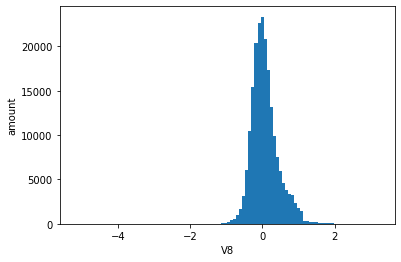

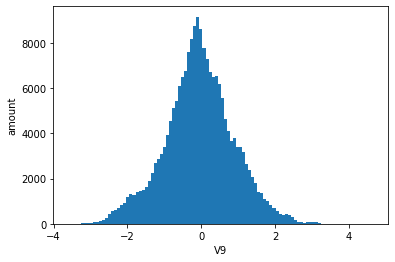

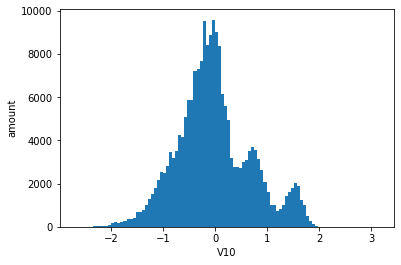

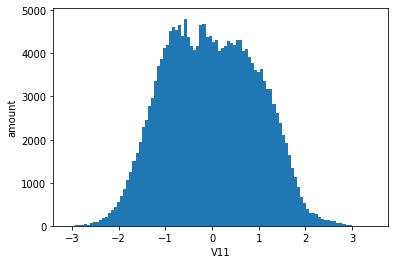

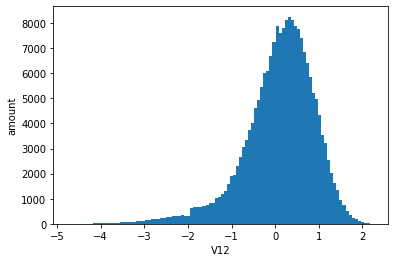

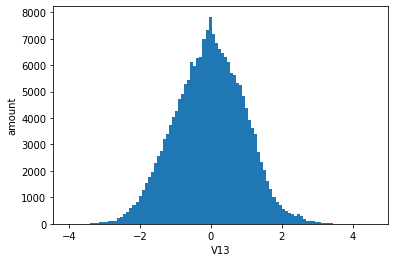

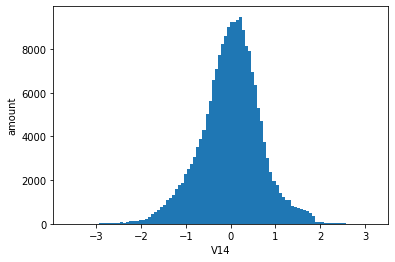

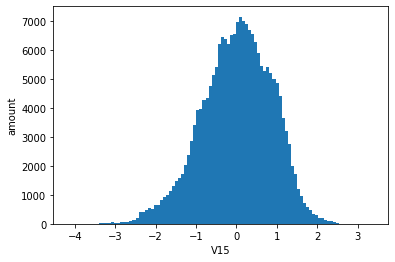

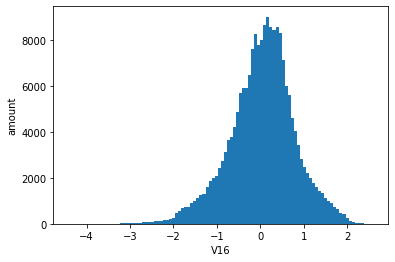

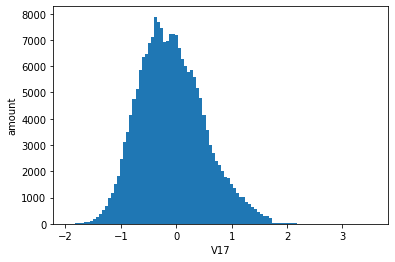

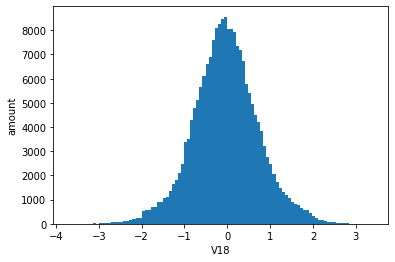

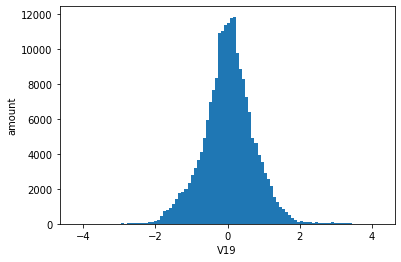

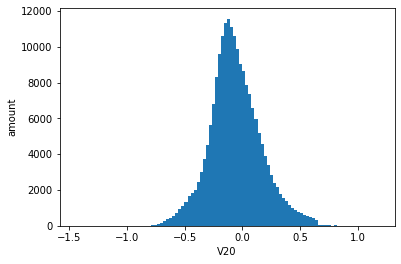

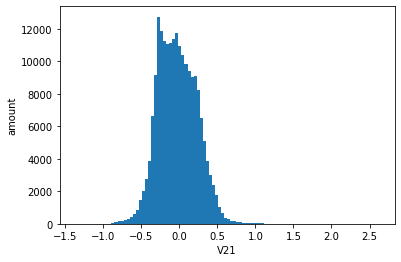

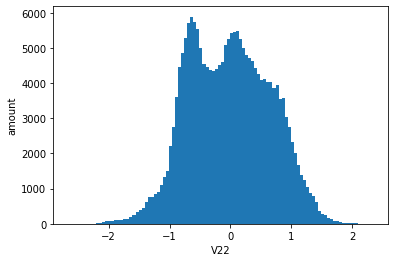

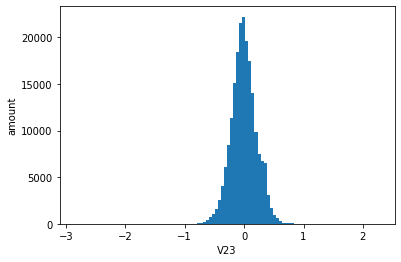

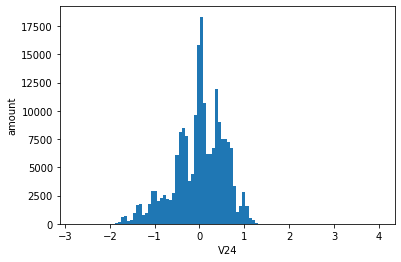

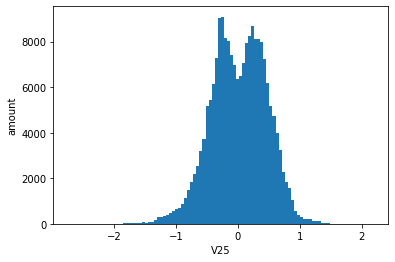

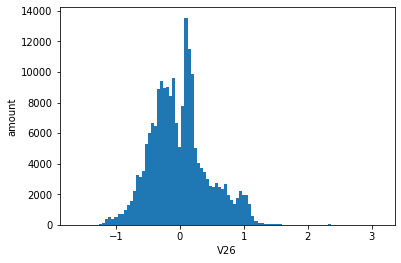

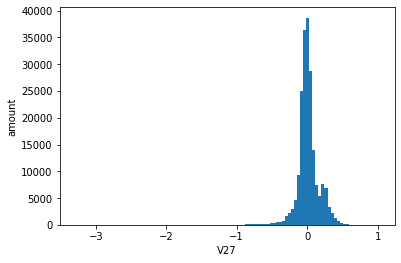

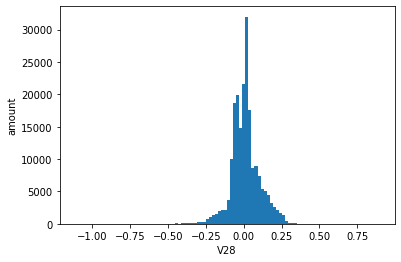

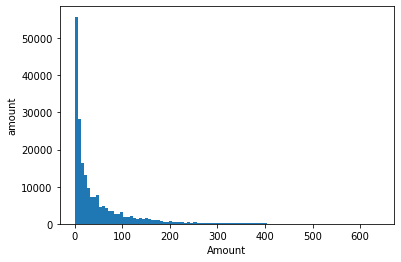

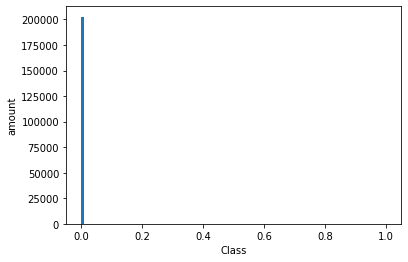

In [19]:
for i in range(len(df_out.columns)):
    plt.hist(df_out.iloc[:,i],bins=100)
    plt.xlabel(df_out.columns[i])
    plt.ylabel('amount')
    plt.show()

In [20]:
# слишком мало мошеннических данных, возвращаемся к выборке с выбросами

# Разделение выборки на тренинговую и тестовую

In [21]:
X = df.drop('Class', axis=1)
X = X.drop('Time',axis =1)
y = df['Class']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [23]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [24]:
col_names = ['Amount']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)



In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [27]:
#Логическая регрессия без ресмплинга
classifier_LR = LogisticRegression(random_state=21, max_iter=1000)
classifier_LR.fit(X_train, y_train)
y_pred_lr_clear = classifier_LR.predict(X_test)
# метрики для LR_clear
accuracy_LR_clear = accuracy_score(y_test,y_pred_lr_clear)*100
recall_LR_clear = recall_score(y_test, y_pred_lr_clear, average = 'binary')*100
precision_LR_clear = precision_score(y_test, y_pred_lr_clear)*100
f1_LR_clear = f1_score(y_test, y_pred_lr_clear)*100

In [28]:
#Рандомный лес
classifier_RF = RandomForestClassifier(n_estimators = 10)
classifier_RF.fit(X_train,y_train)
y_pred_rf_clear = classifier_RF.predict(X_test)
# метрики для RF_clear
accuracy_rf_clear = accuracy_score(y_test,y_pred_rf_clear)*100
recall_rf_clear = recall_score(y_test, y_pred_rf_clear, average = 'binary')*100
precision_rf_clear = precision_score(y_test, y_pred_rf_clear)*100
f1_rf_clear = f1_score(y_test, y_pred_rf_clear)*100

In [29]:
#KNN
#classifier_KNN = KNeighborsClassifier(n_neighbors = 3)
#classifier_KNN.fit(X_train, y_train)
#y_pred_KNN_clear = classifier_KNN.predict(X_test)
# метрики для KNN_clear
#accuracy_KNN_clear = accuracy_score(y_test,y_pred_KNN_clear)*100
#recall_KNN_clear = recall_score(y_test, y_pred_KNN_clear, average = 'binary')*100
#precision_KNN_clear = precision_score(y_test, y_pred_KNN_clear)*100
#f1_KNN_clear = f1_score(y_test, y_pred_KNN_clear)*100

In [30]:
LR_clear = pd.DataFrame({'LR_clear':[accuracy_LR_clear,recall_LR_clear,precision_LR_clear,f1_LR_clear]},index = ['Accuracy','Recall','Precision','F1-score'])
rf_clear = pd.DataFrame({'RF_clear':[accuracy_rf_clear,recall_rf_clear,precision_rf_clear,f1_rf_clear]},index = ['Accuracy','Recall','Precision','F1-score'])
#KNN_clear = pd.DataFrame([accuracy_KNN_clear,recall_KNN_clear,precision_KNN_clear,f1_KNN_clear])

df = pd.DataFrame()
df = pd.concat([LR_clear, rf_clear],axis = 1,)
df

LR_clear   RF_clear
Accuracy   99.909537  99.949482
Recall     56.338028  72.535211
Precision  84.210526  96.261682
F1-score   67.510549  82.730924

# Рандомный Оверресемплинг

In [31]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)
# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)
print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

Genuine: 198277 / 50.0 % of the dataset
Frauds: 198277 / 50.0 % of the dataset


In [32]:
#Логическая регрессия c оверресемплингом
classifier_LR = LogisticRegression(random_state=21, max_iter=1000)
classifier_LR.fit(X_over, y_over)
y_pred_lr_over = classifier_LR.predict(X_test)
# метрики для LR_clear
accuracy_LR_over = accuracy_score(y_test,y_pred_lr_over)*100
recall_LR_over = recall_score(y_test, y_pred_lr_over, average = 'binary')*100
precision_LR_over = precision_score(y_test, y_pred_lr_over)*100
f1_LR_over = f1_score(y_test, y_pred_lr_over)*100


In [33]:
#Рандомный лес
classifier_RF = RandomForestClassifier(n_estimators = 10)
classifier_RF.fit(X_over,y_over)
y_pred_rf_over = classifier_RF.predict(X_test)
# метрики для RF_clear
accuracy_rf_over = accuracy_score(y_test,y_pred_rf_over)*100
recall_rf_over = recall_score(y_test, y_pred_rf_over, average = 'binary')*100
precision_rf_over = precision_score(y_test, y_pred_rf_over)*100
f1_rf_over = f1_score(y_test, y_pred_rf_over)*100

In [34]:
LR_over = pd.DataFrame({'LR_random_over':[accuracy_LR_over,recall_LR_over,precision_LR_over,f1_LR_over]},index = ['Accuracy','Recall','Precision','F1-score'])
rf_over = pd.DataFrame({'RF_random_over':[accuracy_rf_over,recall_rf_over,precision_rf_over,f1_rf_over]},index = ['Accuracy','Recall','Precision','F1-score'])
df = pd.concat([df, LR_over, rf_over],axis = 1)
df

LR_clear   RF_clear  LR_random_over  RF_random_over
Accuracy   99.909537  99.949482       97.465871       99.948307
Recall     56.338028  72.535211       88.732394       71.126761
Precision  84.210526  96.261682        5.558006       97.115385
F1-score   67.510549  82.730924       10.460772       82.113821

# Рандомный Недоресемплинг

In [35]:
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
rus = RandomUnderSampler(random_state=42)
# fit and apply the transform
X_under, y_under = rus.fit_resample(X_train, y_train)
print('Genuine:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('Frauds:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

Genuine: 331 / 50.0 % of the dataset
Frauds: 331 / 50.0 % of the dataset


In [36]:
#Логическая регрессия c недоресемплингом
classifier_LR = LogisticRegression(random_state=21, max_iter=1000)
classifier_LR.fit(X_under, y_under)
y_pred_lr_under = classifier_LR.predict(X_test)
# метрики для LR_clear
accuracy_LR_under = accuracy_score(y_test,y_pred_lr_under)*100
recall_LR_under = recall_score(y_test, y_pred_lr_under, average = 'binary')*100
precision_LR_under = precision_score(y_test, y_pred_lr_under)*100
f1_LR_under = f1_score(y_test, y_pred_lr_under)*100


In [37]:
#Рандомный лес
classifier_RF = RandomForestClassifier(n_estimators = 10)
classifier_RF.fit(X_under,y_under)
y_pred_rf_under = classifier_RF.predict(X_test)
# метрики для RF_clear
accuracy_rf_under = accuracy_score(y_test,y_pred_rf_under)*100
recall_rf_under = recall_score(y_test, y_pred_rf_under, average = 'binary')*100
precision_rf_under = precision_score(y_test, y_pred_rf_under)*100
f1_rf_under = f1_score(y_test, y_pred_rf_under)*100

In [38]:
LR_under = pd.DataFrame({'LR_random_under':[accuracy_LR_under,recall_LR_under,precision_LR_under,f1_LR_under]},index = ['Accuracy','Recall','Precision','F1-score'])
rf_under = pd.DataFrame({'RF_random_under':[accuracy_rf_under,recall_rf_under,precision_rf_under,f1_rf_under]},index = ['Accuracy','Recall','Precision','F1-score'])
df = pd.concat([df, LR_under, rf_under],axis = 1)
df

LR_clear   RF_clear  LR_random_over  RF_random_over  \
Accuracy   99.909537  99.949482       97.465871       99.948307   
Recall     56.338028  72.535211       88.732394       71.126761   
Precision  84.210526  96.261682        5.558006       97.115385   
F1-score   67.510549  82.730924       10.460772       82.113821   

           LR_random_under  RF_random_under  
Accuracy         96.039616        97.347212  
Recall           88.028169        85.915493  
Precision         3.592986         5.169492  
F1-score          6.904170         9.752198

# SMOTE Оверресемплинг

In [39]:
from imblearn.over_sampling import SMOTE

Sm = SMOTE(random_state=42)
# fit and apply the transform
X_sm_over, y_sm_over = Sm.fit_resample(X_train, y_train)


In [40]:
#Логическая регрессия c недоресемплингом
classifier_LR = LogisticRegression(random_state=21, max_iter=1000)
classifier_LR.fit(X_sm_over, y_sm_over)
y_pred_lr_sm_over = classifier_LR.predict(X_test)
# метрики для LR_clear
accuracy_LR_sm_over = accuracy_score(y_test,y_pred_lr_sm_over)*100
recall_LR_sm_over = recall_score(y_test, y_pred_lr_sm_over, average = 'binary')*100
precision_LR_sm_over = precision_score(y_test, y_pred_lr_sm_over)*100
f1_LR_sm_over = f1_score(y_test, y_pred_lr_sm_over)*100

In [41]:
#Рандомный лес
classifier_RF = RandomForestClassifier(n_estimators = 10)
classifier_RF.fit(X_sm_over,y_sm_over)
y_pred_rf_sm_over = classifier_RF.predict(X_test)
# метрики для RF_clear
accuracy_rf_sm_over = accuracy_score(y_test,y_pred_rf_sm_over)*100
recall_rf_sm_over = recall_score(y_test, y_pred_rf_sm_over, average = 'binary')*100
precision_rf_sm_over = precision_score(y_test, y_pred_rf_sm_over)*100
f1_rf_sm_over = f1_score(y_test, y_pred_rf_sm_over)*100

In [42]:
LR_sm_over = pd.DataFrame({'LR_SMOTE_over':[accuracy_LR_sm_over,recall_LR_sm_over,precision_LR_sm_over,f1_LR_sm_over]},index = ['Accuracy','Recall','Precision','F1-score'])
rf_sm_over = pd.DataFrame({'RF_SMOTE_over':[accuracy_rf_sm_over,recall_rf_sm_over,precision_rf_sm_over,f1_rf_sm_over]},index = ['Accuracy','Recall','Precision','F1-score'])
df = pd.concat([df, LR_sm_over, rf_sm_over],axis = 1)
df

LR_clear   RF_clear  LR_random_over  RF_random_over  \
Accuracy   99.909537  99.949482       97.465871       99.948307   
Recall     56.338028  72.535211       88.732394       71.126761   
Precision  84.210526  96.261682        5.558006       97.115385   
F1-score   67.510549  82.730924       10.460772       82.113821   

           LR_random_under  RF_random_under  LR_SMOTE_over  RF_SMOTE_over  
Accuracy         96.039616        97.347212      97.243826      99.943608  
Recall           88.028169        85.915493      88.028169      74.647887  
Precision         3.592986         5.169492       5.093725      89.830508  
F1-score          6.904170         9.752198       9.630200      81.538462

# ВЫВОД
При анализе моделей выделяются 3 "фаворита". 

Случайный лес на чистых данных реагирует на 72 % всех мошеннических транзакций при этом модель реагирует с точностью 96 %.

Несколько схожие характеристики имеет случайный лес с рандомным оверресемплингом: полнота - 71 %, точность 97 %.

Более высокую полноту при пониженной точности показывает случайный лес с SMOTE оверресемплингом: полнота - 74.6 %, точность 89 %. Для данных моделей характерна самая высокая F1-мера.

С точки зрения банковского скоринга из данных моделей лучше 3ий вариант, ввиду наибольшей полноты охвата мошеннических действий.